### <b> Dominik Szot <br> Laboratorium 08 <br> Rozwiązywanie równań nieliniowych </b>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker
import sympy

<b> Zadanie 1. </b> Dane jest równanie:

$$
    f(x) = x^2 - 3x + 2 = 0
$$

Każda z następujących funkcji definiuje równoważny schemat iteracyjny:

$$
    g_1(x) = (x^2 + 2)/3
$$

$$
    g_2(x) = \sqrt {3x-2}
$$

$$
    g_3(x) = 3 - 2/x
$$

$$
    g_4(x) = (x^2 - 2)/(2x-3)
$$

* Przeanalizuj zbieżność oraz rząd zbieżności schematów iteracyjnych odpowiadających funkcjom
$ g_i(x) $ dla pierwiastka $ x = 2 $ badając wartość $ |g_i'(2)| $

* Potwierdź analizę teoretyczną implementując powyższe schematy iteracyjne
$ i $ weryfikując ich zbieżność (lub brak). Każdy schemat iteracyjny wykonaj
przez $ 10 $ iteracji. Wyznacz eksprymentalnie rząd zbieżności każdej metody iteracyjnej ze wzoru 
$$ r = \frac {ln \frac {\epsilon_k} {\epsilon_{k+1}}} {ln \frac {\epsilon_{k-1}} {\epsilon_{k}}} 
$$ 
gdzie błąd bezwzględny $ \epsilon_k $ definiujemy jako $ \epsilon_k  = |x_k − x_∗| $ , $ x_k $ jest przybliżeniem pierwiastka w k-tej iteracji, a $ x_∗ $ dokładnym położeniem pierwiastka
równania.

* Na wspólnym rysynku przedstaw wykresy błędu względnego każdej metody
w zależności od numeru iteracji. Użyj skali logarytmicznej na osi $ y $ (pomocna
będzie funkcja `semilogy`).
Stwórz drugi rysunek, przedstawiający wykresy błędu względnego tylko dla
metod zbieżnych.

Schematy iteracyjne do przeanalizowania

In [14]:
g1 = lambda x: (x**2 + 2)/3
g2 = lambda x: sympy.sqrt(3*x-2)
g3 = lambda x : 3-2/x
g4 = lambda x : (x**2 - 2)/(2*x - 3)

x = sympy.symbols('x')
g1_diff = sympy.diff(g1(x), x)
g2_diff = sympy.diff(g2(x), x)
g3_diff = sympy.diff(g3(x), x)
g4_diff = sympy.diff(g4(x), x)

print(f"g1'(x) = {g1_diff}")
print(f"g2'(x) = {g2_diff}")
print(f"g3'(x) = {g3_diff}")
print(f"g4'(x) = {g4_diff}")

g1'(x) = 2*x/3
g2'(x) = 3/(2*sqrt(3*x - 2))
g3'(x) = 2/x**2
g4'(x) = 2*x/(2*x - 3) - 2*(x**2 - 2)/(2*x - 3)**2


In [15]:
print(f"g1'(2) = {sympy.N(g1_diff.subs(x, 2))}")
print(f"g2'(2) = {sympy.N(g2_diff.subs(x, 2))}")
print(f"g3'(2) = {sympy.N(g3_diff.subs(x, 2))}")
print(f"g4'(2) = {sympy.N(g4_diff.subs(x, 2))}")

g1'(2) = 1.33333333333333
g2'(2) = 0.750000000000000
g3'(2) = 0.500000000000000
g4'(2) = 0


Wartości $g'_{2}(2), g'_{3}(2), g'_{4}(2)$ są mniejsze od 1 więc z tw. o zbieżności procesu itearcyjnego są one zbieżne do pierwiastka x = 2. Funkcja $g'_{4}(2)$ posiada rząd zbieżności równy co najmniej 2 ponieważ wartość $g'_{4}(2) = 0$

Wartości $g'_{1}(2) > 1$ więc proces iteracyjny nie jest zbieżny

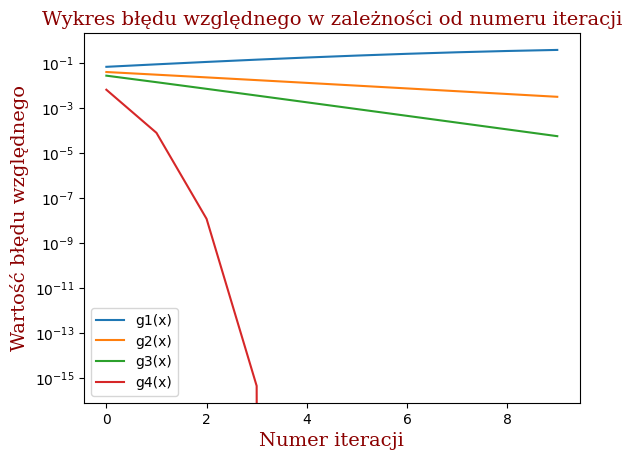

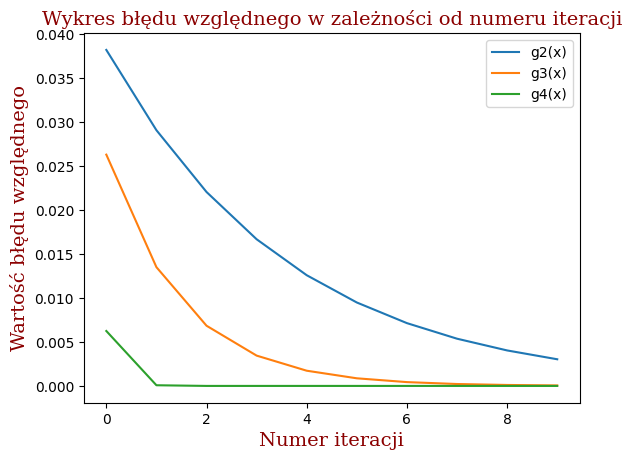

In [16]:
g1_x0 = 1.9
g2_x0 = 1.9
g3_x0 = 1.9
g4_x0 = 1.9

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
}

x = sympy.symbols('x')

data = [[[1.6] for _ in range(10)] for _ in range(4)]
error = [[[1.6] for _ in range(10)] for _ in range(4)]
r_rate = [[[] for _ in range(8)] for _ in range(4)]

actual_value = 2

for i in range(10):
    g1_x0 = sympy.N(g1(g1_x0))
    g2_x0 = sympy.N(g2(g2_x0))
    g3_x0 = sympy.N(g3(g3_x0))
    g4_x0 = sympy.N(g4(g4_x0))

    data[0][i] = np.double(sympy.N(g1_x0))
    data[1][i] = np.double(np.abs(sympy.N(g2_x0)))
    data[2][i] = np.double(sympy.N(g3_x0))
    data[3][i] = np.double(sympy.N(g4_x0))

    for j in range(4):
        error[j][i] = np.abs(actual_value - data[j][i])

for i in range(1, 8):
    for j in range(4):
        if error[j][i] != 0 and error[j][i - 1] != 0 and error[j][i + 1] != 0:
            r_rate[j][i] = np.log(np.float64(error[j][i] / error[j][i+1])) / np.log(np.float64(error[j][i-1]/ error[j][i]))

plt.title("Wykres błędu względnego w zależności od numeru iteracji", fontdict=font)
plt.xlabel("Numer iteracji", fontdict=font)
plt.ylabel("Wartość błędu względnego", fontdict=font)
plt.semilogy([i for i in range(10)], [i/actual_value for i in error[0]], label="g1(x)")
plt.semilogy([i for i in range(10)], [i/actual_value for i in error[1]], label="g2(x)")
plt.semilogy([i for i in range(10)], [i/actual_value for i in error[2]], label="g3(x)")
plt.semilogy([i for i in range(10)], [i/actual_value for i in error[3]], label="g4(x)")
plt.legend()
plt.show()

plt.title("Wykres błędu względnego w zależności od numeru iteracji", fontdict=font)
plt.xlabel("Numer iteracji", fontdict=font)
plt.ylabel("Wartość błędu względnego", fontdict=font)
plt.plot([i for i in range(10)], [i/actual_value for i in error[1]], label="g2(x)")
plt.plot([i for i in range(10)], [i/actual_value for i in error[2]], label="g3(x)")
plt.plot([i for i in range(10)], [i/actual_value for i in error[3]], label="g4(x)")
plt.legend()
plt.show()

Wartość błędu względnego spada najszybciej dla schematu iteracyjnego $g_{4}(x)$ - jest to zgodne z obliczeniami teoretycznymi, dla których schemat  $g_{4}(x)$ posiada największy rząd zbieżności.

<b> Zadanie 2. </b> Napisz schemat iteracji wg metody Newtona dla każdego z następujących równań nieliniowych:

$$
    x^3 - 2x - 5 = 0
$$

$$ 
    e^{-x} = x
$$

$$ 
    xsin(x) = 1
$$

Jeśli $ x_0 $ jest przybliżeniem pierwiastka z dokładnością 4 bitów, ile iteracji należy
wykonać aby osiągnąć:
* 24-bitową dokładność
* 53-bitową dokładność

In [17]:
f1_x = lambda x : x**3 - 2*x - 5
f2_x = lambda x : np.e**(-x) - x
f3_x = lambda x : x*(sympy.sin(x)).evalf() - 1

Równanie $x^3 - 2x - 5 = 0$

In [18]:
import seaborn
seaborn.set(style='ticks')

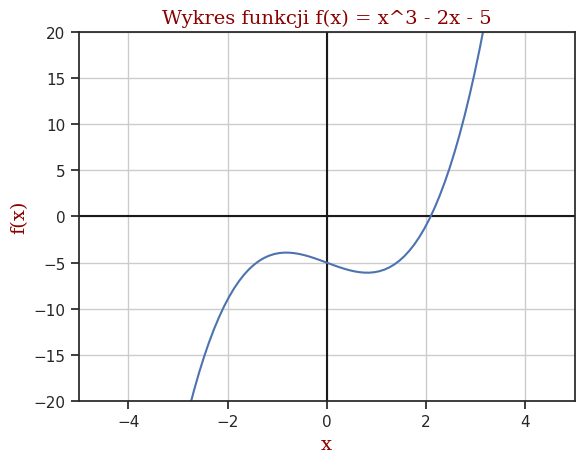

f(1) * f(3) = -96

POCHODNE FUNKCJI 
 f'(x) = 3*x**2 - 2 
 f''(x) = 6*x

SPRAWDZAMY ZNAK WYRAŻENIA f'(x) * f''(x) DLA PUNKTÓW BRZEGOWYCH
f'(1) * f''(1) = 6
f'(3) * f''(3) = 450

Warunek zbieżności dla x_0 = 3: 0.460800000000000 < 1

   PREVIOUS    ACTUAL  PRECISSION
0 1.0000000 3.0000000   2.0000000
1 3.0000000 2.3600000   0.6400000
2 2.3600000 2.1271968   0.2328032
3 2.1271968 2.0951360   0.0320607
4 2.0951360 2.0945517   0.0005844
5 2.0945517 2.0945515   0.0000002

Dla x5 warunek został spełniony. Miejscem zerowym funkcji z dokładnością e = 10**(-6) jest [2.09455148]


In [19]:
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-5, 5)
plt.ylim(-20, 20)
plt.grid(which="both")

x = np.linspace(-5, 5, 100)
y = f1_x(x)

plt.plot(x, y)
plt.title("Wykres funkcji f(x) = x^3 - 2x - 5", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("f(x)", fontdict=font)
plt.show()


f_x = f1_x

a = 1
b = 3

# Sprawdzam czy funkcja na przedziale [a,b] zmienia znak
print(f"f({a}) * f({b}) = {f_x(1) * f_x(3)}")
x = sympy.symbols('x')

# Kryterium stopu ustalam na 10**(-6)
stop_criteria = 10**(-6)

# Pochodną stopnia 1 i 2 obliczam za pomocą biblioteki sympy
derrivative_degree_01 = sympy.diff(f_x(x), x)
derrivative_degree_02 = sympy.diff(sympy.diff(f_x(x), x))

print(f"\nPOCHODNE FUNKCJI \n f'(x) = {derrivative_degree_01} \n f''(x) = {derrivative_degree_02}\n")

print(f"SPRAWDZAMY ZNAK WYRAŻENIA f'(x) * f''(x) DLA PUNKTÓW BRZEGOWYCH")
print(f"f'({a}) * f''({a}) = {derrivative_degree_01.subs(x, a) * derrivative_degree_02.subs(x, a)}")
print(f"f'({b}) * f''({b}) = {derrivative_degree_01.subs(x, b) * derrivative_degree_02.subs(x, b)}\n")

result = np.abs((f_x(b) * derrivative_degree_02.subs(x, b).evalf())/(derrivative_degree_01.subs(x, b).evalf() ** 2))
print(f"Warunek zbieżności dla x_0 = {b}: {result} < 1\n")

x_prev = a
x_next = b

presission = float(np.abs(x_next - x_prev))

data = {'PREVIOUS': [x_prev],
        'ACTUAL': [x_next],
        'PRECISSION': [presission]}
df = pd.DataFrame(data)

pd.options.display.float_format = '{:,.7f}'.format

while presission >= stop_criteria:
    x_prev = float(x_next)
    x_next = float(x_prev - f_x(x_prev)/derrivative_degree_01.subs(x, x_prev).evalf())
    presission = float(np.abs(x_next - x_prev))

    data = {'PREVIOUS': x_prev,
        'ACTUAL': x_next,
        'PRECISSION': presission} 
    
    df.loc[len(df)] = data

print(df)
print(f"\nDla x{len(df) - 1} warunek został spełniony. Miejscem zerowym funkcji z dokładnością e = 10**(-6) jest {df['ACTUAL'].values[-1:]}")

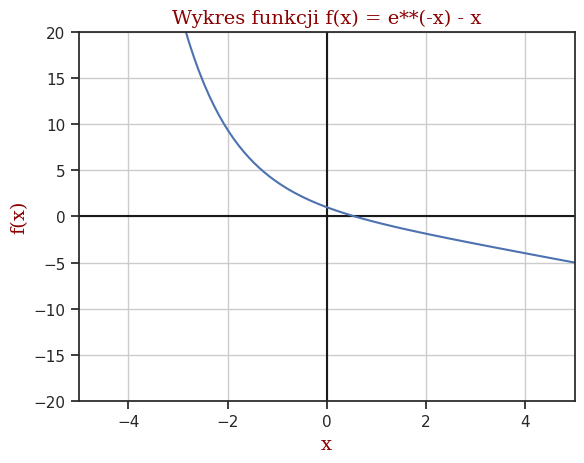

f(0) * f(2) = 1.8648902470065432

POCHODNE FUNKCJI 
 f'(x) = -1 - 1.0/2.71828182845905**x 
 f''(x) = 1.0/2.71828182845905**x

SPRAWDZAMY ZNAK WYRAŻENIA f'(x) * f''(x) DLA PUNKTÓW BRZEGOWYCH
f'(0) * f''(0) = -2.00000000000000
f'(2) * f''(2) = -0.153650922125347

Warunek zbieżności dla x_0 = 2: 0.195777834188402 < 1

   PREVIOUS    ACTUAL  PRECISSION
0 0.0000000 2.0000000   2.0000000
1 2.0000000 0.3576088   1.6423912
2 0.3576088 0.5587083   0.2010996
3 0.5587083 0.5671304   0.0084221
4 0.5671304 0.5671433   0.0000129
5 0.5671433 0.5671433   0.0000000

Dla x5 warunek został spełniony. Miejscem zerowym funkcji z dokładnością e = 10**(-6) jest [0.56714329]


In [20]:
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-5, 5)
plt.ylim(-20, 20)
plt.grid(which="both")
x = np.linspace(-5, 5, 100)
y = f2_x(x)

plt.plot(x, y)
plt.title("Wykres funkcji f(x) = e**(-x) - x", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("f(x)", fontdict=font)
plt.show()

f_x = f2_x
a = 0
b = 2

# Sprawdzam czy funkcja na przedziale [a,b] zmienia znak
print(f"f({a}) * f({b}) = {f_x(1) * f_x(3)}")
x = sympy.symbols('x')

# Kryterium stopu ustalam na 10**(-6)
stop_criteria = 10**(-6)

# Pochodną stopnia 1 i 2 obliczam za pomocą biblioteki sympy
derrivative_degree_01 = sympy.diff(f_x(x), x)
derrivative_degree_02 = sympy.diff(sympy.diff(f_x(x), x))

print(f"\nPOCHODNE FUNKCJI \n f'(x) = {derrivative_degree_01} \n f''(x) = {derrivative_degree_02}\n")

print(f"SPRAWDZAMY ZNAK WYRAŻENIA f'(x) * f''(x) DLA PUNKTÓW BRZEGOWYCH")
print(f"f'({a}) * f''({a}) = {derrivative_degree_01.subs(x, a) * derrivative_degree_02.subs(x, a)}")
print(f"f'({b}) * f''({b}) = {derrivative_degree_01.subs(x, b) * derrivative_degree_02.subs(x, b)}\n")

result = np.abs((f_x(b) * derrivative_degree_02.subs(x, b).evalf())/(derrivative_degree_01.subs(x, b).evalf() ** 2))
print(f"Warunek zbieżności dla x_0 = {b}: {result} < 1\n")

x_prev = a
x_next = b

presission = float(np.abs(x_next - x_prev))

data = {'PREVIOUS': [x_prev],
        'ACTUAL': [x_next],
        'PRECISSION': [presission]}
df = pd.DataFrame(data)

pd.options.display.float_format = '{:,.7f}'.format

while presission >= stop_criteria:
    x_prev = float(x_next)
    x_next = float(x_prev - f_x(x_prev)/derrivative_degree_01.subs(x, x_prev).evalf())
    presission =  float(np.abs(x_next - x_prev))

    data = {'PREVIOUS': x_prev,
        'ACTUAL': x_next,
        'PRECISSION': presission} 
    
    df.loc[len(df)] = data

print(df)
print(f"\nDla x{len(df) - 1} warunek został spełniony. Miejscem zerowym funkcji z dokładnością e = 10**(-6) jest {df['ACTUAL'].values[-1:]}")

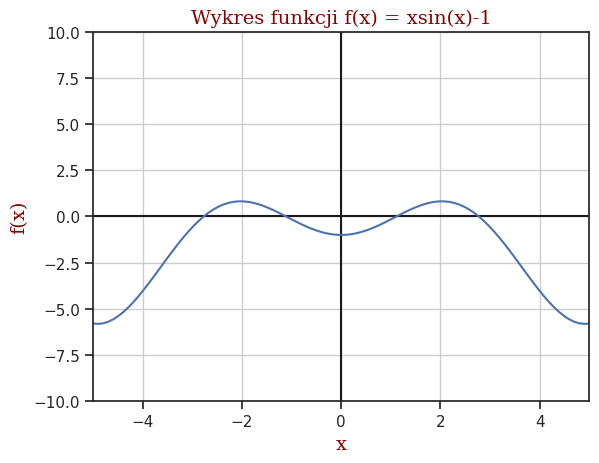

Funkcja okresowa z nieskończona ilością pierwiastków!
Obliczamy dwa pierwsze pierwiastki
Przedział dla pierwszego pierwiastka [1, 2]
Przedział dla drugiego pierwiastka [2, 3]
f(1) * f(2) = -0.129771035990675
f(2) * f(3) = -0.472034516616225

POCHODNE FUNKCJI 
 f'(x) = x*cos(x) + sin(x) 
 f''(x) = -x*sin(x) + 2*cos(x)

SPRAWDZAMY ZNAK WYRAŻENIA f'(x) * f''(x) DLA PUNKTÓW BRZEGOWYCH
f'(1) * f''(1) = 0.330428458592127
f'(2) * f''(2) = -0.204128367282907

f'(2) * f''(2) = -0.204128367282907
f'(3) * f''(3) = 6.79872053362289

Znaki różne dla przedziałów!
 Sprawdzamy warunek zbieżności dla obu skrajnych punktów obu przedziałów

Dla x_0 = 1 | 0.0198552712865168|
Dla x_0 = 2 | 365.962581675656|
Dla x_0 = 2 | 365.962581675656|
Dla x_0 = 3 | 0.173180397338601|

Warunek spełniony dla x_0 = 1 z przedziału [1 ,2]
Warunek spełniony dla x_0 = 3 z przedziału [2 ,3]
   PREVIOUS    ACTUAL  PRECISSION
0 0.0000000 1.0000000   1.0000000
1 1.0000000 1.1147287   0.1147287
2 1.1147287 1.1141571   0.0005715
3 

In [21]:
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-5, 5)
plt.ylim(-10, 10)
plt.grid(which="both")
x = np.linspace(-5, 5, 100)
y = x*np.sin(x) - 1

plt.plot(x, y)
plt.title("Wykres funkcji f(x) = xsin(x)-1", fontdict=font)
plt.xlabel("x", fontdict=font)
plt.ylabel("f(x)", fontdict=font)
plt.show()

f_x = f3_x

print(f"Funkcja okresowa z nieskończona ilością pierwiastków!")
print(f"Obliczamy dwa pierwsze pierwiastki")
print(f"Przedział dla pierwszego pierwiastka [1, 2]")
print(f"Przedział dla drugiego pierwiastka [2, 3]")

a1, a2 = 1, 2
b1, b2 = 2, 3

# Sprawdzam czy funkcja na przedziale [a,b] zmienia znak
print(f"f({a1}) * f({b1}) = {f_x(a1) * f_x(b1)}")

# Sprawdzam czy funkcja na przedziale [a,b] zmienia znak
print(f"f({a2}) * f({b2}) = {f_x(a2) * f_x(b2)}")
x = sympy.symbols('x')

# Kryterium stopu ustalam na 10**(-6)
stop_criteria = 10**(-6)

# Pochodną stopnia 1 i 2 obliczam za pomocą biblioteki sympy
derrivative_degree_01 = sympy.diff(f_x(x), x)
derrivative_degree_02 = sympy.diff(sympy.diff(f_x(x), x))

print(f"\nPOCHODNE FUNKCJI \n f'(x) = {derrivative_degree_01} \n f''(x) = {derrivative_degree_02}\n")

print(f"SPRAWDZAMY ZNAK WYRAŻENIA f'(x) * f''(x) DLA PUNKTÓW BRZEGOWYCH")
print(f"f'({a1}) * f''({a1}) = {sympy.N(derrivative_degree_01.subs(x, a1) * derrivative_degree_02.subs(x, a1))}")
print(f"f'({b1}) * f''({b1}) = {sympy.N(derrivative_degree_01.subs(x, b1) * derrivative_degree_02.subs(x, b1))}\n")

print(f"f'({a2}) * f''({a2}) = {sympy.N(derrivative_degree_01.subs(x, a2) * derrivative_degree_02.subs(x, a2))}")
print(f"f'({b2}) * f''({b2}) = {sympy.N(derrivative_degree_01.subs(x, b2) * derrivative_degree_02.subs(x, b2))}\n")

print(f"Znaki różne dla przedziałów!\n Sprawdzamy warunek zbieżności dla obu skrajnych punktów obu przedziałów\n")
result_a1 = np.abs(sympy.N((f_x(a1) * derrivative_degree_02.subs(x, a1))/(derrivative_degree_01.subs(x, a1) ** 2)))
result_b1 = np.abs(sympy.N((f_x(b1) * derrivative_degree_02.subs(x, b1))/(derrivative_degree_01.subs(x, b1) ** 2)))
result_a2 = np.abs(sympy.N((f_x(a2) * derrivative_degree_02.subs(x, a2))/(derrivative_degree_01.subs(x, a2) ** 2)))
result_b2 = np.abs(sympy.N((f_x(b2) * derrivative_degree_02.subs(x, b2))/(derrivative_degree_01.subs(x, b2) ** 2)))

print(f"Dla x_0 = {a1} | {result_a1}|")
print(f"Dla x_0 = {b1} | {result_b1}|")
print(f"Dla x_0 = {a2} | {result_a2}|")
print(f"Dla x_0 = {b2} | {result_b2}|")

print(f"\nWarunek spełniony dla x_0 = {a1} z przedziału [{a1} ,{b1}]")
print(f"Warunek spełniony dla x_0 = {b2} z przedziału [{a2} ,{b2}]")

# print(f"Warunek zbieżności dla x_0 = {a}: {result} < 1\n")

x_prev = 0
x_next = a1

presission = float(np.abs(x_next - x_prev))

data = {'PREVIOUS': [x_prev],
        'ACTUAL': [x_next],
        'PRECISSION': [presission]}
df = pd.DataFrame(data)

pd.options.display.float_format = '{:,.7f}'.format

while presission >= stop_criteria:
    x_prev =  np.double(x_next)
    x_next =  np.double(sympy.N(x_prev - f_x(x_prev)/derrivative_degree_01.subs(x, x_prev)))
    presission =   np.double(np.abs(x_next - x_prev))

    data = {'PREVIOUS': x_prev,
        'ACTUAL': x_next,
        'PRECISSION': presission} 
    
    df.loc[len(df)] = data

print(df)
print(f"Dla x{len(df) - 1} warunek został spełniony. Miejscem zerowym funkcji z dokładnością e = 10**(-6) jest {df['ACTUAL'].values[-1:]}\n\n")

x_prev = 0
x_next = b2

presission = float(np.abs(x_next - x_prev))

data = {'PREVIOUS': [x_prev],
        'ACTUAL': [x_next],
        'PRECISSION': [presission]}
df = pd.DataFrame(data)

pd.options.display.float_format = '{:,.7f}'.format

while presission >= stop_criteria:
    x_prev = np.double(x_next)
    x_next =  np.double(sympy.N(x_prev - f_x(x_prev)/derrivative_degree_01.subs(x, x_prev)))
    presission =   np.double(np.abs(x_next - x_prev))

    data = {'PREVIOUS': x_prev,
        'ACTUAL': x_next,
        'PRECISSION': presission} 
    
    df.loc[len(df)] = data

print(df)
print(f"Dla x{len(df) - 1} warunek został spełniony. Miejscem zerowym funkcji z dokładnością e = 10**(-6) jest {df['ACTUAL'].values[-1:]}")

Ile iteracji należy wykonać aby osiągnąć:
* 24-bitową dokładność 
* 53-bitową dokładność

Zakładając że błąd bezwzględny jest proporcjonalny do kwadratu odległości pierwiastka od wartości rzeczywistej możemy wyznaczyć wzór na dokładność:
$|ERR_{n}| = 2*|ERR_{n-1}^{2}|$ <br> gdzie 2 = K jest stałą dla metody Newtona 

Tak więc, aby osiągnąć:
* 24-bitową dokładność należy wykonać 3 iteracje
* 53-bitową dokładność należy wykonać 4 iteracje


<b> Zadanie 3. </b> Napisz schemat iteracji wg metody Newtona dla następującego układu równań nieliniowych:
$$
    x_1^2 + x_2^2 = 1
$$

$$
    x_1^2 - x_2 = 0
$$

Korzystając z faktu, że dokładne rozwiązanie powyższego układu równań to:

$$
    x_1 = += \sqrt {\frac {\sqrt {5}} {2} - \frac {1} {2}}
$$

$$
    x_2 = += \frac {\sqrt {5}} {2} - \frac {1} {2}
$$

oblicz błąd względny rozwiązania znalezionego metodą Newtona.

[4.0, 3.9840000160320486, 3.9680320961602242, 3.952096240384529, 3.936192448704961, 3.920320721121522, 3.9044810576342113, 3.888673458243028, 3.872897922947973, 3.857154451749046, 3.841443044646248, 3.825763701639578, 3.810116422729035, 3.7945012079146214, 3.7789180571963352, 3.763366970574178, 3.7478479480481486, 3.732360989618247, 3.716906095284474, 3.7014832650468286, 3.6860924989053117, 3.6707337968599236, 3.6554071589106623, 3.64011258505753, 3.6248500753005257, 3.6096196296396497, 3.594421248074901, 3.579254930606282, 3.564120677233791, 3.5490184879574267, 3.533948362777192, 3.5189103016930843, 3.5039043047051055, 3.488930371813255, 3.473988503017532, 3.4590786983179376, 3.4442009577144708, 3.4293552812071333, 3.4145416687959225, 3.399760120480841, 3.385010636261888, 3.3702932161390615, 3.355607860112365, 3.340954568181795, 3.3263333403473543, 3.3117441766090416, 3.2971870769668565, 3.2826620414208003, 3.268169069970871, 3.2537081626170714, 3.2392793193593996, 3.2248825401978554,

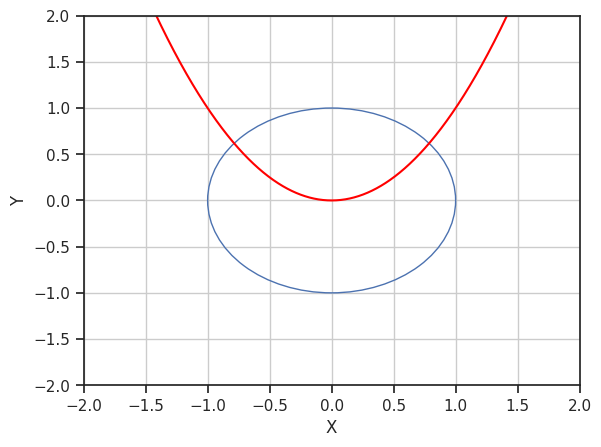

Iteracja 0 Wartość: [-0.83333333  0.66666667]
Iteracja 1 Wartość: [-0.78809524  0.61904762]
Iteracja 2 Wartość: [-0.78615407  0.61803445]
Iteracja 3 Wartość: [-0.78615138  0.61803399]
Iteracja 4 Wartość: [-0.78615138  0.61803399]
Iteracja 5 Wartość: [-0.78615138  0.61803399]
Iteracja 6 Wartość: [-0.78615138  0.61803399]
Iteracja 7 Wartość: [-0.78615138  0.61803399]
Iteracja 8 Wartość: [-0.78615138  0.61803399]
Iteracja 9 Wartość: [-0.78615138  0.61803399]
Błąd względny [0.00000000e+00 1.79637859e-16]


In [22]:
f_x = lambda x, y: np.array([x**2 + y**2 -1, x**2 - y])

x1 = np.array([-np.sqrt(np.sqrt(5)/2 - 1/2), np.sqrt(5)/2 - 1/2])

ax = plt.gca()
ax.cla() 
circle = plt.Circle((0,0), 1, color="b",fill=False)
plt.grid(which="both")
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))    
ax.add_patch(circle)

ax.set_xlabel("X")
ax.set_ylabel("Y")

x2 = np.linspace(-2, 2, 1000)
y2 = [i**2 for i in x2]

print(y2)

ax.plot(x2, y2, color="red")
plt.show()

# Będziemy korzystać z metody newtona dla układu równań 

jakobian = lambda x,y: np.array([[2*x, 2*y], [2*x, -1]])

x0 = [-1, 1]
for i in range(10):
    s = np.linalg.solve(jakobian(x0[0], x0[1]), -f_x(x0[0], x0[1]))
    x0 = x0 + s 
    print(f"Iteracja {i} Wartość: {x0}")

print(f"Błąd względny {np.abs((x0 - x1)/x1)}")


Wartość błędu względnego spada.